In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from main2 import get_retention_rates,get_avg_retention_rate

,cohort,user,time_year,time_month,subscription,content,genres,recency_new,bounce
0,0,0,2018,0,1,4,4,"0,4",0
1,0,1,2018,0,1,8,3,"0,125","0,5"
2,0,2,2018,0,1,4,2,0,"0,2"
3,0,3,2018,0,1,2,2,"0,75","0,25"
4,0,4,2018,0,1,3,2,0,1


,cohort,user,time_year,time_month,subscription
count,30442.000000,30442.000000,30442.000000,30442.000000,30442.0
mean,5.500723,9764.188720,2018.214178,5.892188,1.0
std,3.500705,5599.130687,0.410257,3.495266,0.0
min,0.000000,0.000000,2018.000000,0.000000,1.0
25%,2.000000,4879.000000,2018.000000,3.000000,1.0
50%,6.000000,9901.500000,2018.000000,6.000000,1.0
75%,9.000000,14314.000000,2018.000000,9.000000,1.0
max,11.000000,20331.000000,2019.000000,11.000000,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30442 entries, 0 to 30441
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cohort         30442 non-null  int64 
 1   user           30442 non-null  int64 
 2   time_year      30442 non-null  int64 
 3   time_month     30442 non-null  int64 
 4   subscription   30442 non-null  int64 
 5   content        30442 non-null  object
 6   genres         30442 non-null  object
 7   recency_new    30442 non-null  object
 8   bounce         30442 non-null  object
dtypes: int64(5), object(4)
memory usage: 2.1+ MB


None

Index(['cohort ', 'user  ', 'time_year ', 'time_month ', 'subscription ',
       'content ', 'genres ', 'recency_new ', 'bounce'],
      dtype='object')

[2385, 3821, 1973, 1495, 2398, 2596, 3435, 2631, 1807, 2273, 3219, 2409]


In [3]:
#3a
get_retention_rates(0)

[0.46085858585858586,
 0.07397260273972603,
 0.2962962962962963,
 0.0625,
 0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

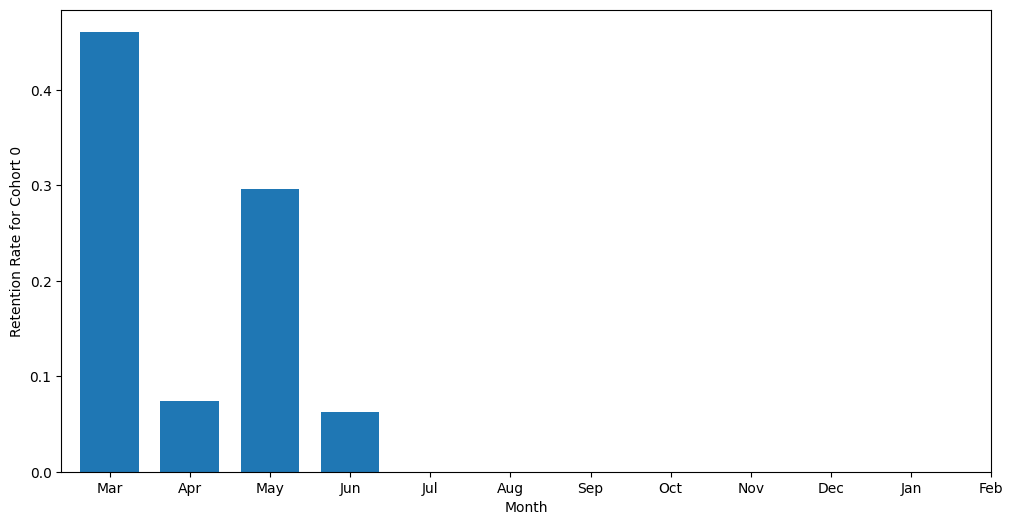

In [51]:
#3b
def plot(data: list[float], ylabel):
    data = data + [0]*(12-len(data))
    t = np.linspace(0,12,12)
    plt.figure(figsize=(12,6))
    plt.bar(t, data, tick_label=["Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan", "Feb"])
    plt.xlabel("Month")
    plt.ylabel(ylabel)
    plt.show()

plot(get_retention_rates(0),'Retention Rate for Cohort 0')

In [52]:
#3c
print(get_avg_retention_rate(0))

0.17872549697892165


In [53]:
#3d
#https://dougshapiro.medium.com/to-everything-churn-churn-churn-b9044d376be
#Gjøre om fra churn rate til retention rate


In [55]:
#3e - monthly retention rates
#Leaving out cohort 0
rentention_rates_cohorts_0_to_11 = []
for i in range(12):
    rentention_rates_cohorts_0_to_11 += [get_retention_rates(i)]
print(rentention_rates_cohorts_0_to_11)

[[0.46085858585858586, 0.07397260273972603, 0.2962962962962963, 0.0625, 0, nan, nan, nan, nan, nan, nan, nan], [0.5438898450946644, 0.17009493670886075, 0.03255813953488372, 0.5714285714285714, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 0, nan], [0.4191443074691806, 0.01730103806228374, 0.4, 0.5, 0, nan, nan, nan, nan, nan, nan, nan], [0.16441620333598095, 0.09178743961352658, 0.3684210526315789, 0.14285714285714285, 1.0, 1.0, 0, nan, nan, nan, nan, nan], [0.4665257223396758, 0.324773413897281, 0.18604651162790697, 0.65, 0.7692307692307693, 0.8, 0, nan, nan, nan, nan, nan], [0.4993849938499385, 0.12438423645320197, 0.2871287128712871, 0.5862068965517241, 0.5882352941176471, 0.1, 0, nan, nan, nan, nan, nan], [0.7248677248677249, 0.08832116788321168, 0.24793388429752067, 0.6333333333333333, 0.2631578947368421, 0, nan, nan, nan, nan, nan, nan], [0.7076183939601922, 0.10572259941804074, 0.24770642201834864, 0.25925925925925924, 0, nan, nan, nan, nan, nan, nan, nan], [0.4593669803250642, 0.1638733705772

In [56]:
#3e - Average retention rates
#leaving in cohort 0
average_rentention_rates_cohorts_0_to_11 = []
for i in range(12):
    average_rentention_rates_cohorts_0_to_11 += [get_avg_retention_rate(i)]
    print(average_rentention_rates_cohorts_0_to_11[i])

0.17872549697892165
0.5743610447969982
0.26728906910629285
0.39535454834831846
0.4566537738708047
0.3121914476919712
0.32626900085310545
0.2640613349311682
0.19274190590740453
0.15535193993183574
0.4325767690253672
nan


c:\Users\ida\OneDrive - NTNU\Documents\H23\Marketing\CPA\CPA_code\eth-marketing23\task3\main2.py:58: RuntimeWarning: Mean of empty slice
  return np.nanmean(retention_rates)


Text(0, 0.5, 'Retention rate')

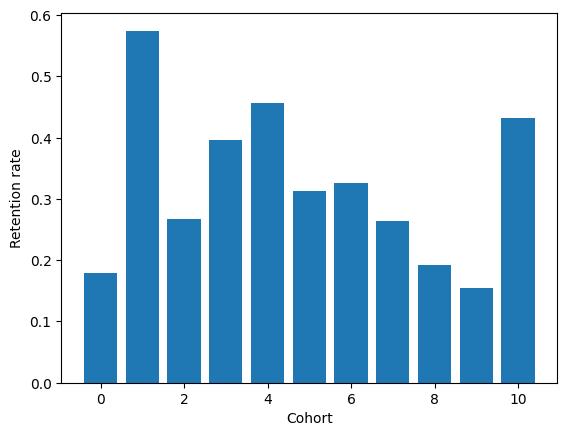

In [58]:
#3f
plt.bar(np.arange(12),average_rentention_rates_cohorts_0_to_11)
plt.xlabel('Cohort')
plt.ylabel('Retention rate')

C:\Users\ida\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\shape_base.py:402: RuntimeWarning: Mean of empty slice
  buff[ind] = asanyarray(func1d(inarr_view[ind], *args, **kwargs))


<BarContainer object of 12 artists>

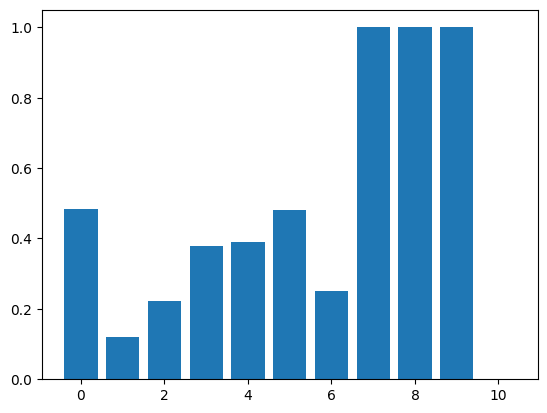

In [72]:
#3g - average monthly retention rate across cohorts
#NOTE: average is unweighted
rentention_rates_cohorts_0_to_11 = np.array(rentention_rates_cohorts_0_to_11)
avg_monthly_retention_rate_across_cohorts = np.apply_along_axis(np.nanmean,axis = 0, arr = rentention_rates_cohorts_0_to_11)
plt.bar(np.arange(12),avg_monthly_retention_rate_across_cohorts)

In [74]:
#3h - average monthly retention rate across cohorts and months
avg_monthly_retention_rate_across_cohorts_and_months = np.nanmean(np.apply_along_axis(np.nanmean,axis = 0, arr = rentention_rates_cohorts_0_to_11))
print(avg_monthly_retention_rate_across_cohorts_and_months)


0.4838220981922136


C:\Users\ida\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\shape_base.py:402: RuntimeWarning: Mean of empty slice
  buff[ind] = asanyarray(func1d(inarr_view[ind], *args, **kwargs))


In [ ]:
#3i
#Vil tro 3g er best fordi det viser forskjeller i tid for et større datasett men idk
